# Setup

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import reporting.app.log_analyzer.apache_log_analyzer as apache_log_analyzer
import reporting.app.log_analyzer.log_analyzer as log_analyzer

# Draw

## URL Statistics

<BarContainer object of 14 artists>

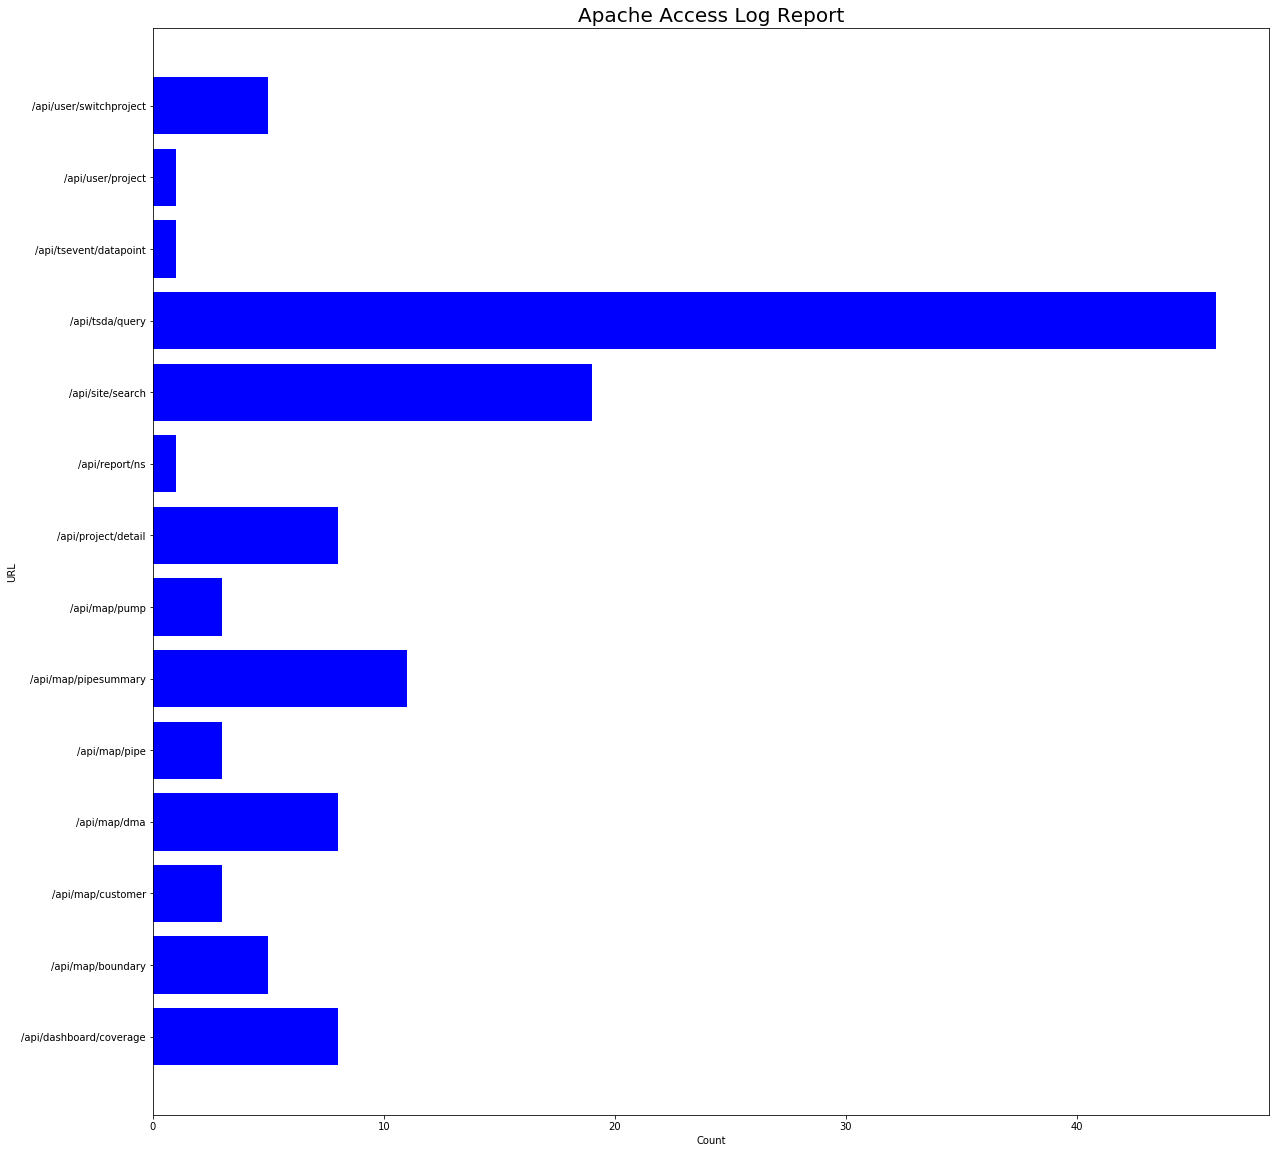

In [2]:
analyzer = apache_log_analyzer.APILogAnalyzer()
apache_log_analyzer.load_file("access_20190610.log", analyzer)

output = analyzer.output

output = sorted(output.items(), key=lambda d: d[0])

fig=plt.figure(figsize=(20,20))
subplt1=fig.add_subplot(1,1,1)
subplt1.set_title('Apache Access Log Report', fontsize=20)
subplt1.set_xlabel('Count')
subplt1.set_ylabel('URL')

df = pd.DataFrame(output)
subplt1.barh(df[0], df[1], color='blue')


## IP Statistics

<BarContainer object of 10 artists>

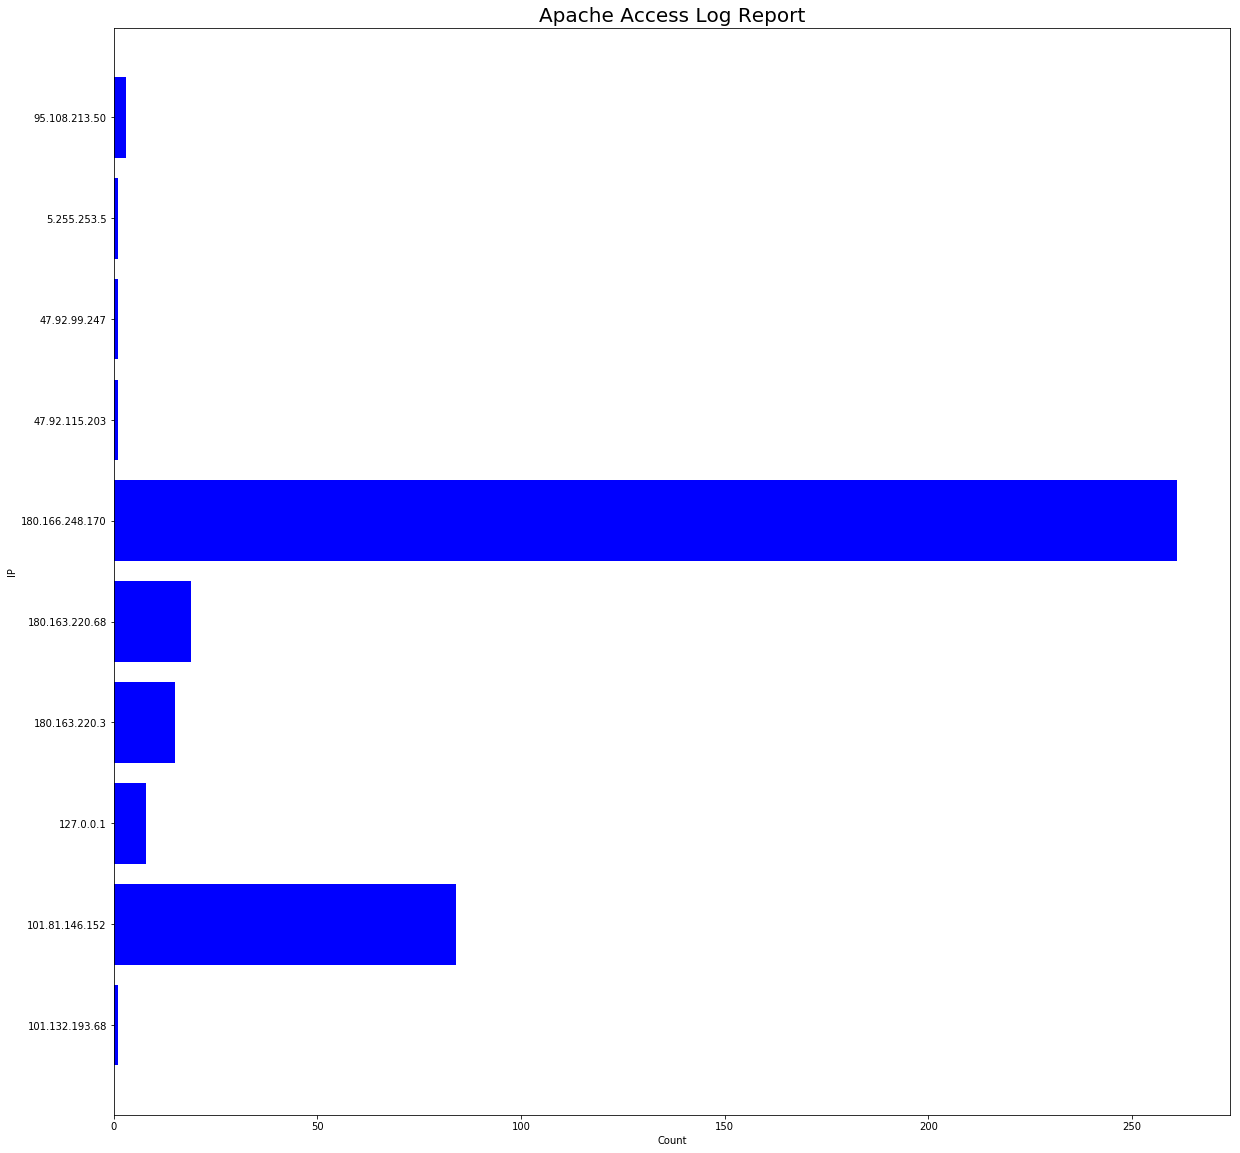

In [3]:
analyzer = log_analyzer.LogAnalyzer()
apache_log_analyzer.load_file("access_20190610.log", analyzer)

output = analyzer.output

output = sorted(output.items(), key=lambda d: d[0])

fig=plt.figure(figsize=(20,20))
subplt1=fig.add_subplot(1,1,1)
subplt1.set_title('Apache Access Log Report', fontsize=20)
subplt1.set_xlabel('Count')
subplt1.set_ylabel('IP')

df = pd.DataFrame(output)
subplt1.barh(df[0], df[1], color='blue')
